In [87]:
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import norm
from scipy import stats
import sidetable as stb
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [30]:
df = pd.read_csv('train.csv')

In [31]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [32]:
df.shape

(381109, 12)

In [33]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


# Initial Data Exploration/Pre-processing

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [35]:
#Drop columns that aren't useful: 
#To prevent errors in multiple run of cell, errors on drop is ignored

df = df.drop(["id"], axis=1, errors="ignore")

In [36]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [38]:
#Looks like this column has 53 unique region codes, could be useful information 
#related to annual premium costs

#df['Region_Code'].nunique()
df['Region_Code'].unique()
#df[''].unique()

array([28.,  3., 11., 41., 33.,  6., 35., 50., 15., 45.,  8., 36., 30.,
       26., 16., 47., 48., 19., 39., 23., 37.,  5., 17.,  2.,  7., 29.,
       46., 27., 25., 13., 18., 20., 49., 22., 44.,  0.,  9., 31., 12.,
       34., 21., 10., 14., 38., 24., 40., 43., 32.,  4., 51., 42.,  1.,
       52.])

In [64]:
#According to the description of this dataset, policy sales channel refers to how the customer was 
#contacted when they gave their response. I will not be dropping this for now because
#it may contain valueable information 


#df['Policy_Sales_Channel'].nunique()
#df['Policy_Sales_Channel'].value_counts()
#df['Vehicle_Age'].value_counts()
#df['Region_Code'].value_counts()

In [82]:
#Vehicle age is currently represented as an object, in order to convert it into a continuous value
#we can convert the argument into a number that satisfies it, then convert that "number" into a float type
#I'm choosing to do it this way in order to do feature engineering later, otherwise another option 
#would've been one hot encoding


#df['Vehicle_Age'].replace(to_replace =['> 2 Years'], value = '3', inplace=True)
#df['Vehicle_Age'].replace(to_replace =['1-2 Year'], value = '1.5', inplace=True)
#df['Vehicle_Age'].replace(to_replace =['< 1 Year'], value = '.5', inplace=True)
#df['Vehicle_Age'].unique()
#df['Vehicle_Age'] = df['Vehicle_Age'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  float64
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 32.0+ MB


In [39]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


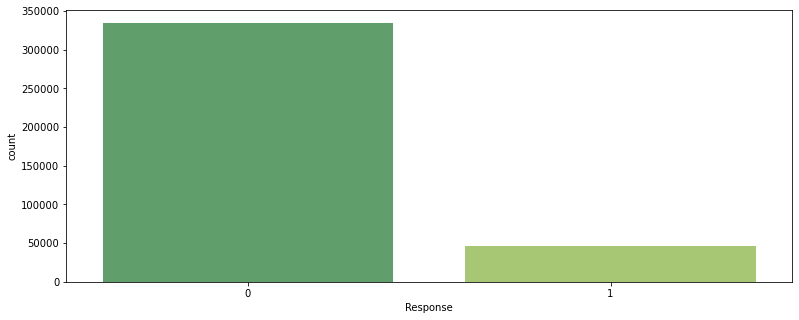

In [40]:
#Look at target distribution: 

plt.figure(figsize = (13, 5))
sns.countplot(df['Response'], palette = 'summer')
plt.show()

In [41]:
#Very inbalanced dataset, will need to fix this later (oversampling of minority class)

### Visualizing Variables, and Relationship with Target 

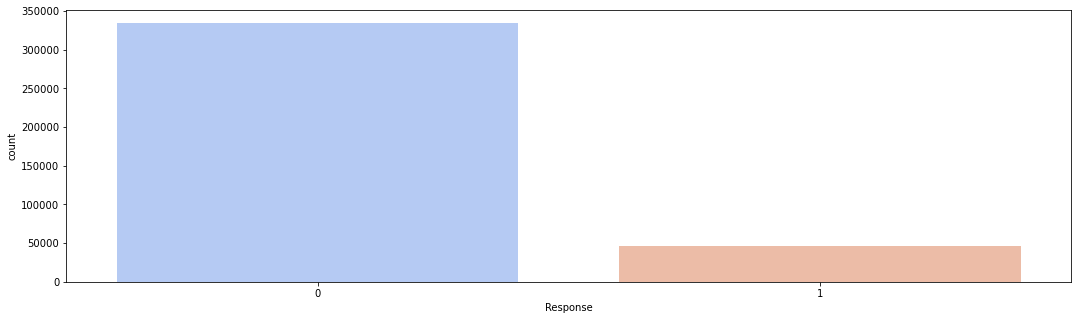

In [42]:
plt.figure(figsize = (18, 5))
sns.countplot(df['Response'],palette = 'coolwarm')
plt.show()

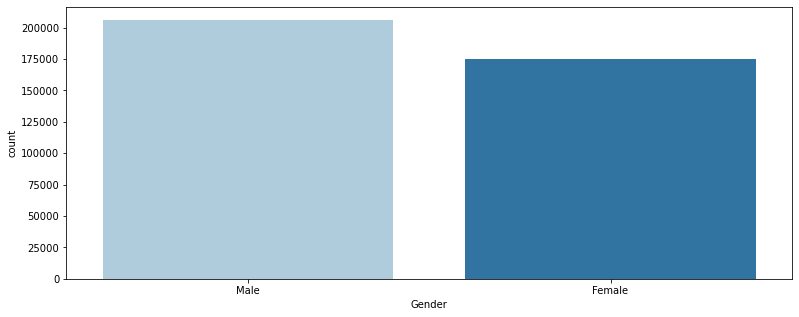

In [43]:
#Gender Distribution: 

plt.figure(figsize = (13, 5))
sns.countplot(df['Gender'], palette = 'Paired')
plt.show()

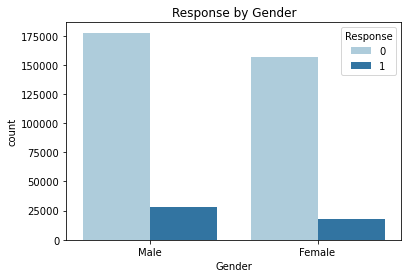

In [44]:
plt.subplot(1,1,1)
sns.countplot(df['Gender'], hue = df['Response'],palette="Paired")
plt.title("Response by Gender")
plt.show()

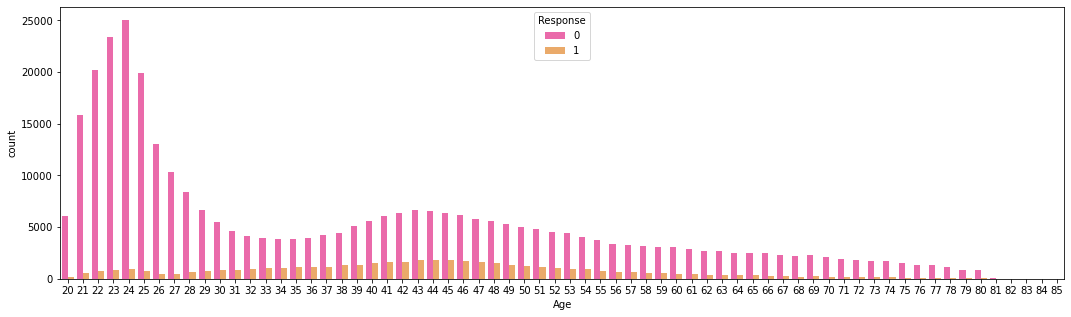

In [45]:
plt.figure(figsize = (18, 5))
sns.countplot(df['Age'], hue= df['Response'], palette = 'spring')
plt.show()

In [ ]:
#Most of our yes responses are coming from people between 35-50

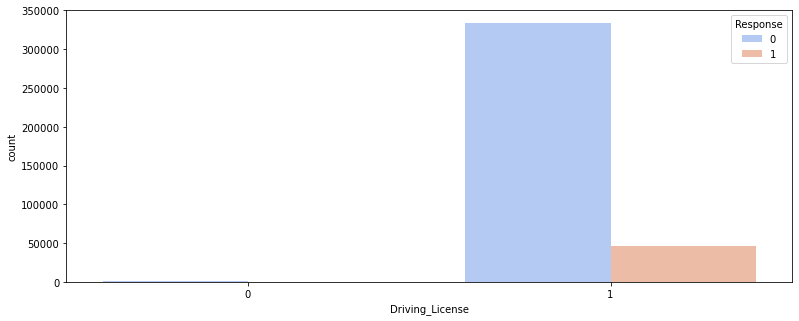

In [46]:
#Drivers License Distribution

plt.figure(figsize = (13, 5))
sns.countplot(df['Driving_License'], hue= df['Response'], palette = 'coolwarm')
plt.show()


#Here we can see that we have more people interested in buying vehicle insurance 
#when they have a drivers license, compared to those that do not have a drivers license, which makes sense

In [85]:
df['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

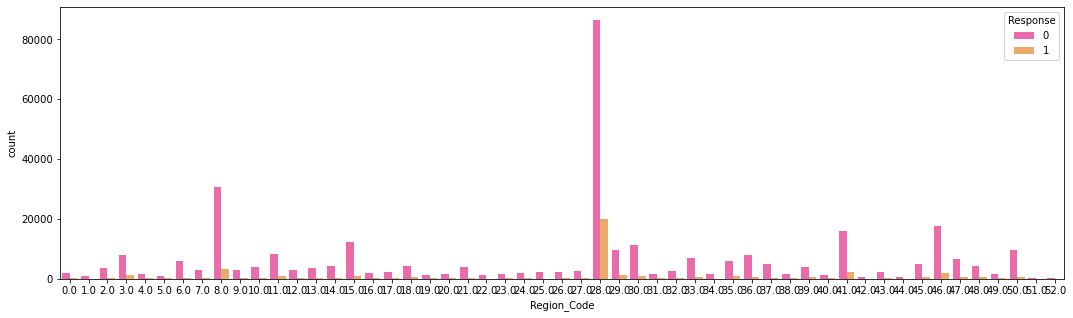

In [47]:
plt.figure(figsize = (18, 5))
sns.countplot(df['Region_Code'], hue= df['Response'], palette = 'spring')
plt.show()

#Here we see that certain region codes have more customers who are interested in buying vehicle insurance
#Namely, region code 28 and 8 & 46- although to a lesser degree

In [98]:
df.groupby(['Region_Code']).Response.value_counts().sort_values(ascending =False)

Region_Code  Response
28.0         0           86498
8.0          0           30620
28.0         1           19917
46.0         0           17717
41.0         0           16039
                         ...  
22.0         1              83
42.0         1              44
44.0         1              33
52.0         1              33
51.0         1              28
Name: Response, Length: 106, dtype: int64

In [102]:
df['Annual_Premium'].describe()


count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

In [103]:
df['Annual_Premium'].nunique()

48838

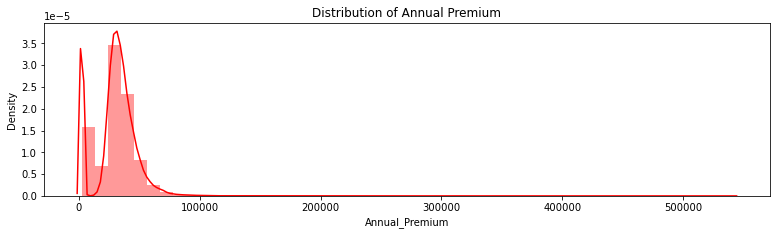

In [26]:
plt.figure(figsize=(13,7))
plt.subplot(2,1,1)
sns.distplot(df['Annual_Premium'], color='red')
plt.title("Distribution of Annual Premium")
plt.show()


#Here we see a bimodal distribution of the Annual Premium, which is also right tailed, 
#indicating a few outliers at the higher premium levels

Text(0.5, 1.05, 'Correlation of Features')

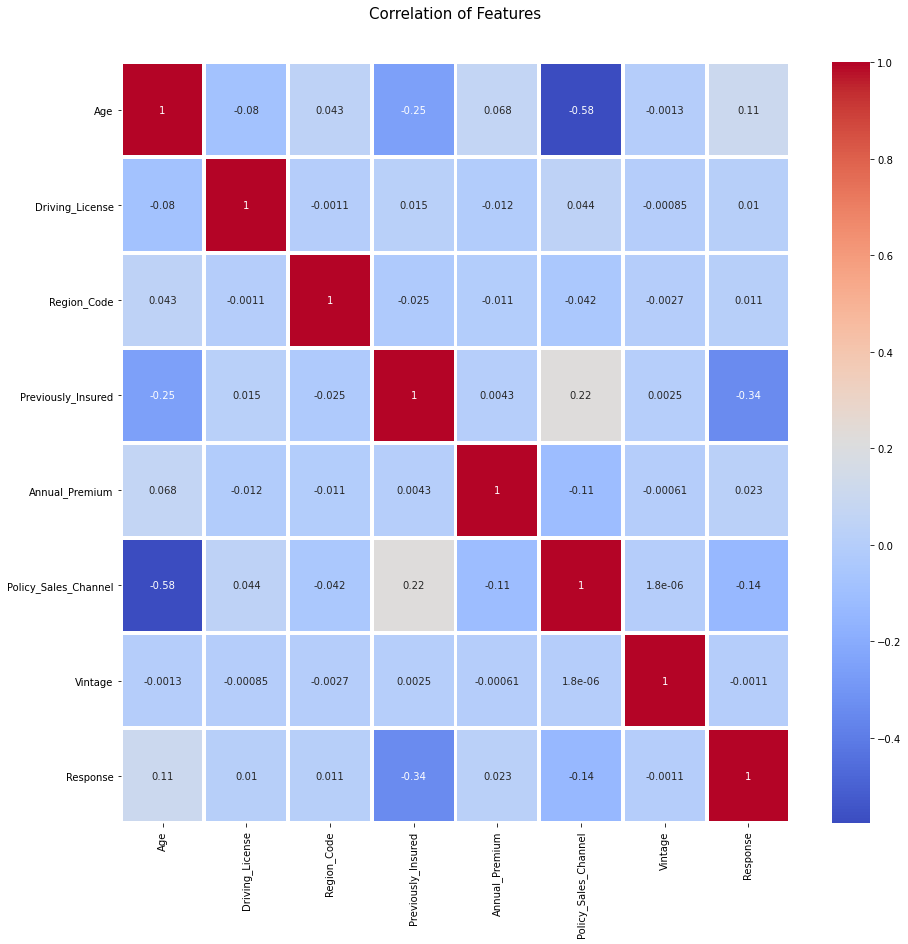

In [48]:
corr = df.corr()
f, ax = plt.subplots(figsize=(15,14))

sns.heatmap(corr, ax=ax, annot=True,linewidths=3,cmap='coolwarm')

plt.title("Correlation of Features", y=1.05, size=15)

## Baseline Model: 

In [28]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [51]:
#change categoricl to numerical in order to fit model:

changelabel= LabelEncoder()
df['Gender'] = changelabel.fit_transform(df['Gender'])
df['Vehicle_Age'] = changelabel.fit_transform(df['Vehicle_Age'])
df['Vehicle_Damage'] = changelabel.fit_transform(df['Vehicle_Damage'])

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  int64  
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  int64  
 6   Vehicle_Damage        381109 non-null  int64  
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 32.0 MB


In [67]:
#features: 
X=df.drop(['Response'],axis=1)

#target:
y=df['Response']        

In [68]:

#dividing the dataset into training and testing
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

(304887, 10) (76222, 10) (304887,) (76222,)


In [70]:
model=LogisticRegression()
model=model.fit(x_train,y_train)
pred=model.predict(x_test)
lr_probability =model.predict_proba(x_test)[:,1]


acc_lr=accuracy_score(y_test,pred)
recall_lr=recall_score(y_test,pred)
precision_lr=precision_score(y_test,pred)
f1score_lr=f1_score(y_test,pred)
AUC_LR=roc_auc_score(pred,y_test)


print("Accuracy : ", accuracy_score(y_test,pred))
print("ROC_AUC Score:",AUC_LR)

Accuracy :  0.8769777754454094
ROC_AUC Score: 0.4384946405846158


In [72]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93     76221
           1       0.00      0.00      0.00         1

    accuracy                           0.88     76222
   macro avg       0.50      0.44      0.47     76222
weighted avg       1.00      0.88      0.93     76222



Text(0.5, 257.44, 'Predicted label')

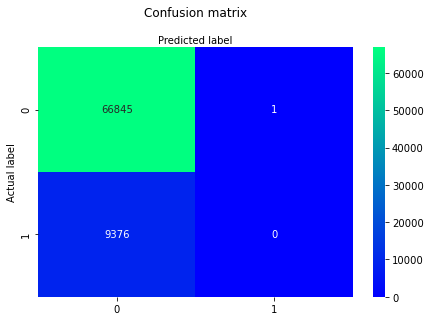

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="winter" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [107]:
df.to_csv('insurance.csv', index=False)